In [0]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
#--------------------Run this cell to mount your Google Drive-------------------
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#--------------------Reading Data from Google Drive------------------------

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Reading the file from Googlr Drive

data = pd.read_csv("/content/drive/My Drive/ER/Simple Linear Regression/delivery_time.csv", sep = ',')
#data_x = data.drop(labels = ["y"], axis = 1)
#data_y = data["y"]

In [0]:
#Preview of  the data
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Text(0.5, 1.0, 'Delivery Time vs Sorting Time')

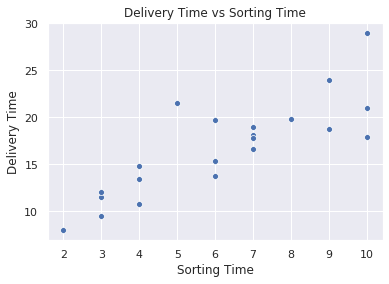

In [0]:
#Plotting Weight gained vs calories consumed graph

sns.set(style = 'darkgrid')
sns.scatterplot(x = "Sorting Time", y = "Delivery Time", data = data)
plt.title("Delivery Time vs Sorting Time")

In [0]:
#Modelling
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(data["Sorting Time"], data["Delivery Time"], test_size = 0.15, random_state = 42)

In [0]:
#Regression Model
LR = LinearRegression()
X_train = np.reshape(list(X_train),(-1,1))
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Predicting for test data
X_test = np.reshape(list(X_test), (-1,1))
y_pred = LR.predict(X_test)

In [0]:
y_pred

array([23.52849662, 18.22706081, 12.925625  , 12.925625  ])

In [0]:
y_test

0     21.00
17    18.11
15    14.88
1     13.50
Name: Delivery Time, dtype: float64

In [0]:
#R^2 calculation.
print("R square for test data is:" , LR.score(X_test, y_test))

R square for test data is: 0.6887045850931086
